# EDA on Presidential Election Polls 2024 Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("election2024.csv")

In [3]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
df.shape

(1600, 16)

In [5]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [6]:
721/1600

0.450625

In [7]:
df['will_vote'].value_counts()

definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: will_vote, dtype: int64

In [8]:
df['candidate'].value_counts()

Putin                 1128
struggle to answer     164
will not take part      96
Davankov                67
Kharitonov              63
Slutskiy                55
spoilt vote             27
Name: candidate, dtype: int64

## Insight 1: Columns job_type and company_type have 56.75% and 45.06% missing values respectively. This high percentage of missing data could potentially bias the analysis if not handled properly. Techniques such as imputation or exclusion of these variables may be necessary to ensure accurate results.

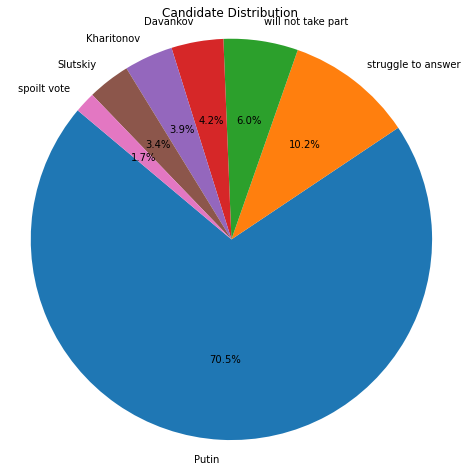

In [9]:
# Count the occurrences of each candidate
candidate_counts = df['candidate'].value_counts()

# Plotting with Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Insight 2: The bulk of population (70.5%) voted for Putin.  This suggests a strong preference for Putin among the voters.

C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

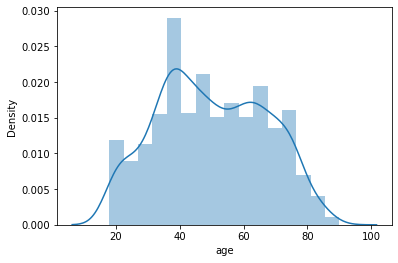

In [10]:
sns.distplot(a = df['age'])

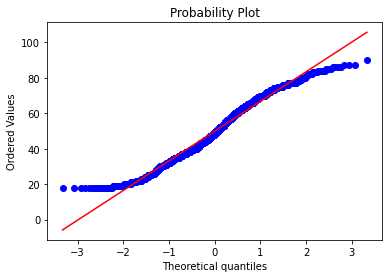

In [11]:
import scipy.stats as stats
stats.probplot(df['age'], dist="norm", plot=plt)
plt.show()

## Insight 3: Based on the above histogram and Quantile-Quantile plot, 'age' of voters is not normally distributed despite mean (49.93%) and median (49%) being nearly equal.

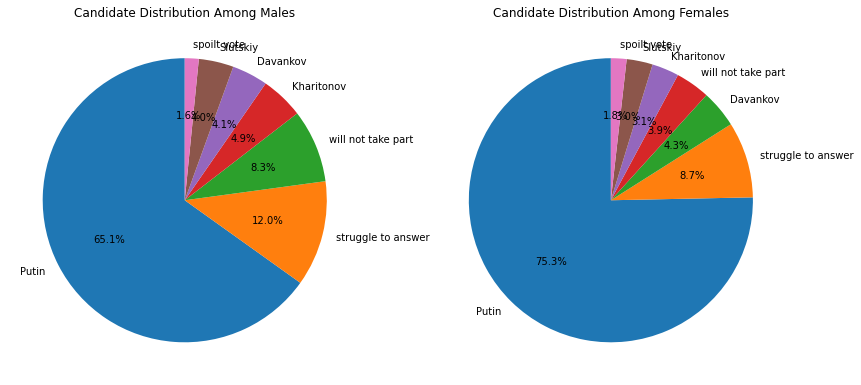

In [12]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Aggregating data for Males and Females
males = df[df['sex'] == 'male']
females = df[df['sex'] == 'female']

# Distribution of 'candidate' among Males
males_counts = males['candidate'].value_counts()
axs[0].pie(males_counts, labels=males_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Candidate Distribution Among Males')

# Distribution of 'candidate' among Females
females_counts = females['candidate'].value_counts()
axs[1].pie(females_counts, labels=females_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Candidate Distribution Among Females')

# Display the pie charts
plt.show()

## Insight 4: Females have a higher probability (10.2%) of voting for Putin compared to males. This trend could be due to various socio-cultural factors influencing female voters. Understanding these factors could provide deeper insights into gender-based voting behavior.

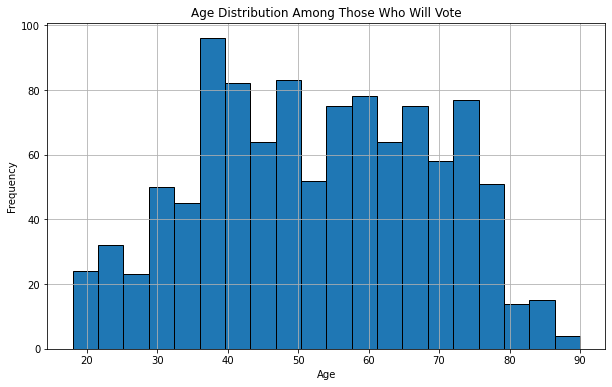

In [13]:
# Filtering the dataframe for rows where 'will_vote' is 'yes'
will_vote_yes = df[df['will_vote'] == 'definitely yes']

# Plotting the distribution of the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(will_vote_yes['age'], bins=20, edgecolor='black')
plt.title('Age Distribution Among Those Who Will Vote')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
import pandas as pd

# Filter the dataframe for rows where 'will_vote' is 'definitely yes'
definitely_yes = df[df['will_vote'] == 'definitely yes']

# Calculate the first and third quartiles
Q1 = definitely_yes['age'].quantile(0.25)
Q3 = definitely_yes['age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print(f'The range of ages that comprises the bulk (middle 50%) of those who will definitely vote is from {Q1} to {Q3}')


The range of ages that comprises the bulk (middle 50%) of those who will definitely vote is from 39.0 to 66.0


## Insight 5: The central age range of the voting population (50%) is between 39 and 66 years.

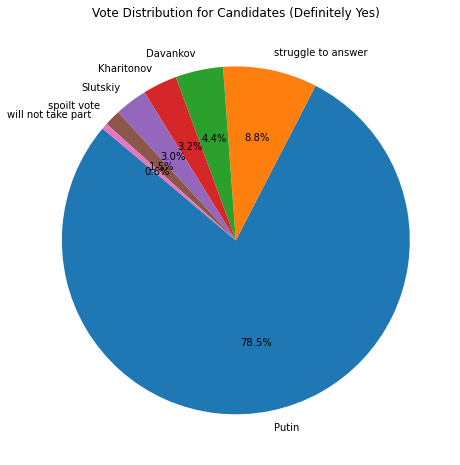

In [15]:
# Filter the DataFrame
filtered_df = df[df['will_vote'] == 'definitely yes']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Vote Distribution for Candidates (Definitely Yes)')
plt.show()


## Insight 6: Among those who definitely decided to vote, 78% voted for Putin. This suggests that decisive voters have a strong preference for Putin, which could imply confidence in his leadership among those certain about their participation in the election.

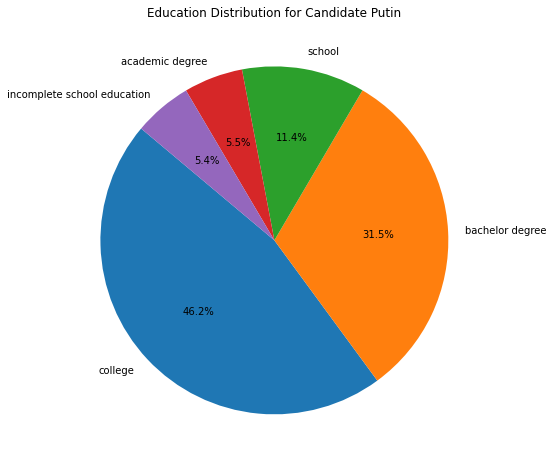

In [16]:
# Filter the DataFrame
filtered_df = df[df['candidate'] == 'Putin']

# Count the occurrences of each education level
education_counts = filtered_df['education'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Distribution for Candidate Putin')
plt.show()

## Insight 7: The bulk of Putin supporters (46.2%) were college students.  This indicates significant support from the younger, educated demographic, suggesting that Putin’s policies may be resonating well with this group. Understanding the specific policies appealing to students could provide insights for future campaigns.

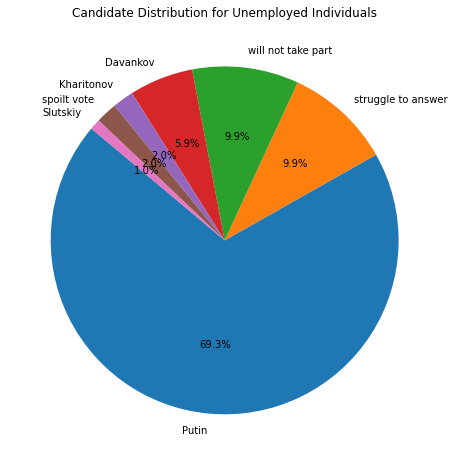

In [17]:
# Filter the DataFrame
filtered_df = df[df['employment'] == 'unemployed']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for Unemployed Individuals')
plt.show()

## Insight 8: The bulk of the unemployed population (69.3%) voted for Putin.  This trend might be influenced by economic policies or promises made by Putin’s administration that appeal to the unemployed demographic. Analyzing these policies could provide further understanding of this support base.

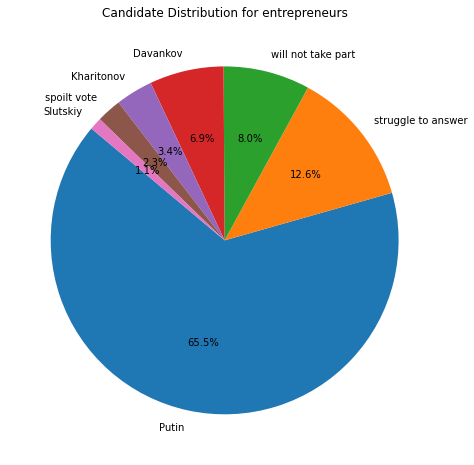

In [18]:
# Filter the DataFrame
filtered_df = df[df['employment'] == 'entrepreneur']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for entrepreneurs')
plt.show()


##  Insight 9: The bulk of entrepreneurs (65.5%) voted for Putin. This suggests that his policies might favor business and entrepreneurship, attracting votes from this demographic. Understanding these policies can provide insights into the economic strategies favored by entrepreneurs.

In [19]:
df['income'].value_counts()

medium         949
high           405
low            149
very high       48
very low        34
hard to say     15
Name: income, dtype: int64

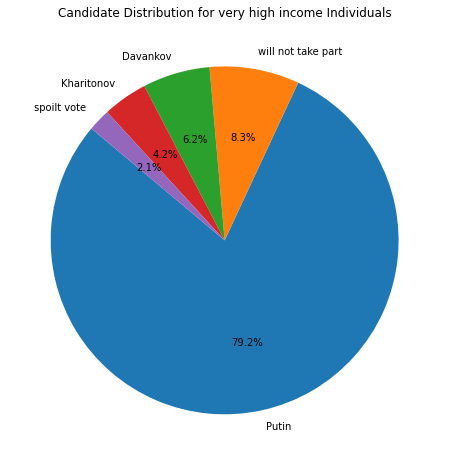

In [20]:
# Filter the DataFrame
filtered_df = df[df['income'] == 'very high']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for very high income Individuals')
plt.show()

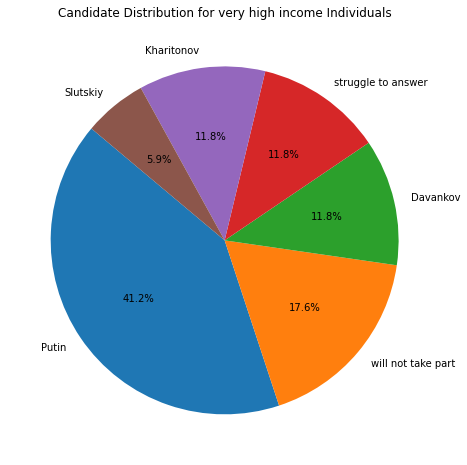

In [21]:
# Filter the DataFrame
filtered_df = df[df['income'] == 'very low']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for very high income Individuals')
plt.show()

## Insight 10: Among very low-income voters, 41.2% supported Putin, compared to 79.2% of high-income voters. This disparity indicates that higher-income voters are more likely to support Putin, which could reflect the impact of economic policies on different income groups.

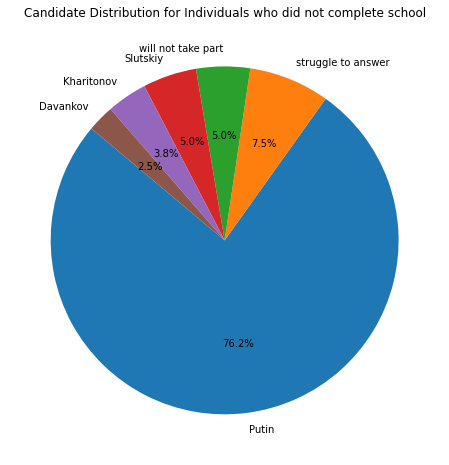

In [22]:
# Filter the DataFrame
filtered_df = df[df['education'] == 'incomplete school education']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for Individuals who did not complete school')
plt.show()

## Insight 11: The majority of the population who did not complete school (76.2%) voted for Putin. This suggests that less-educated voters might feel more aligned with Putin’s policies or rhetoric. Understanding the reasons behind this alignment can provide insights into the educational divide in political support.

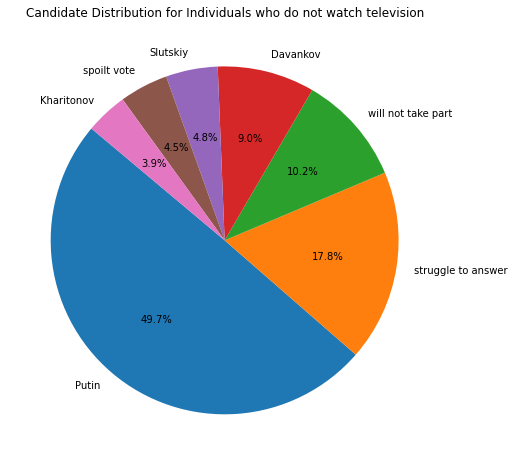

In [23]:
# Filter the DataFrame
filtered_df = df[df['television_usage'] == 'does not watch']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for Individuals who do not watch television')
plt.show()

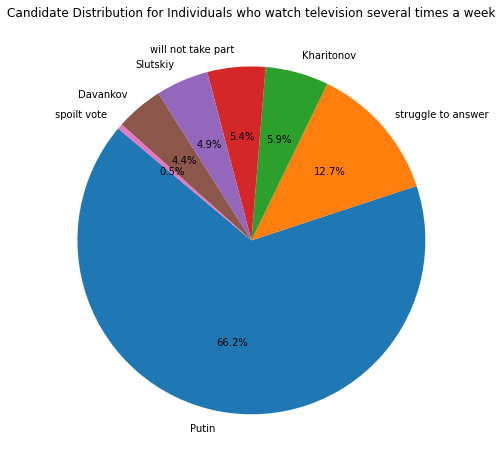

In [24]:
# Filter the DataFrame
filtered_df = df[df['television_usage'] == 'several times a week']

# Count the occurrences of each candidate
candidate_counts = filtered_df['candidate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(candidate_counts, labels=candidate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Candidate Distribution for Individuals who watch television several times a week')
plt.show()

## Insight 12: Putin supporters who frequently watch television (49.7%) were significantly more (16.5% higher) compared to infrequent television users. This implies that television media may have a strong influence on voting behavior, highlighting the importance of media presence and campaigns.

## Summary:

### Insight 1: Columns job_type and company_type have 56.75% and 45.06% missing values respectively. This high percentage of missing data could potentially bias the analysis if not handled properly. Techniques such as imputation or exclusion of these variables may be necessary to ensure accurate results.

### Insight 2: The bulk of population (70.5%) voted for Putin. This suggests a strong preference for Putin among the voters.

### Insight 3: Based on the above histogram and Quantile-Quantile plot, 'age' of voters is not normally distributed despite mean (49.93%) and median (49%) being nearly equal.

### Insight 4: Females have a higher probability (10.2%) of voting for Putin compared to males. This trend could be due to various socio-cultural factors influencing female voters. Understanding these factors could provide deeper insights into gender-based voting behavior

### Insight 5: The central age range of the voting population (50%) is between 39 and 66 years.

### Insight 6: Among those who definitely decided to vote, 78% voted for Putin. This suggests that decisive voters have a strong preference for Putin, which could imply confidence in his leadership among those certain about their participation in the election.

### Insight 7: The bulk of Putin supporters (46.2%) were college students. This indicates significant support from the younger, educated demographic, suggesting that Putin’s policies may be resonating well with this group. Understanding the specific policies appealing to students could provide insights for future campaigns.

### Insight 8: The bulk of the unemployed population (69.3%) voted for Putin. This trend might be influenced by economic policies or promises made by Putin’s administration that appeal to the unemployed demographic. Analyzing these policies could provide further understanding of this support base.

### Insight 9: The bulk of entrepreneurs (65.5%) voted for Putin. This suggests that his policies might favor business and entrepreneurship, attracting votes from this demographic. Understanding these policies can provide insights into the economic strategies favored by entrepreneurs.

### Insight 10: Among very low-income voters, 41.2% supported Putin, compared to 79.2% of high-income voters. This disparity indicates that higher-income voters are more likely to support Putin, which could reflect the impact of economic policies on different income groups.

### Insight 11: The majority of the population who did not complete school (76.2%) voted for Putin. This suggests that less-educated voters might feel more aligned with Putin’s policies or rhetoric. Understanding the reasons behind this alignment can provide insights into the educational divide in political support.

### Insight 12: Putin supporters who frequently watch television (49.7%) were significantly more (16.5% higher) compared to infrequent television users. This implies that television media may have a strong influence on voting behavior, highlighting the importance of media presence and campaigns.